# Entscheidungsbaum

Ein Entscheidungsbaum (Decision Tree) ist ein Algorithmus des überwachten Lernens, der häufig in der klassifikationsbasierten Datenanalyse eingesetzt wird. Im Gegensatz zu vielen anderen Modellen wie linearen Regressionen oder neuronalen Netzen verwendet er keine kontinuierlich trainierbaren Parameter, sondern trifft Entscheidungen auf Basis von rekursiven Teilungen der Eingabedaten.

Ein Entscheidungsbaum besitzt eine klar definierte hierarchische Baumstruktur, die aus folgenden Komponenten besteht:

- **Stammknoten (Root Node):** Der oberste Knoten im Baum, der die erste Entscheidung trifft basierend auf einem Merkmal mit der höchsten Trennschärfe.

- **Innere Knoten (Decision Nodes):** Diese Knoten repräsentieren Zwischenentscheidungen und teilen die Daten anhand bestimmter Merkmalsausprägungen.

- **Zweige (Branches):** Verbindungslinien zwischen den Knoten, die die Pfade von einer Entscheidung zur nächsten abbilden.

- **Blattknoten (Leaf Nodes):** Die Endpunkte im Baum, die eine Klassenzuordnung oder ein Ergebnis darstellen.

Nachfolgend ist eine Abbildung mit diesen wichtigsten Elementen:

Source: https://www.ibm.com/de-de/think/topics/decision-trees

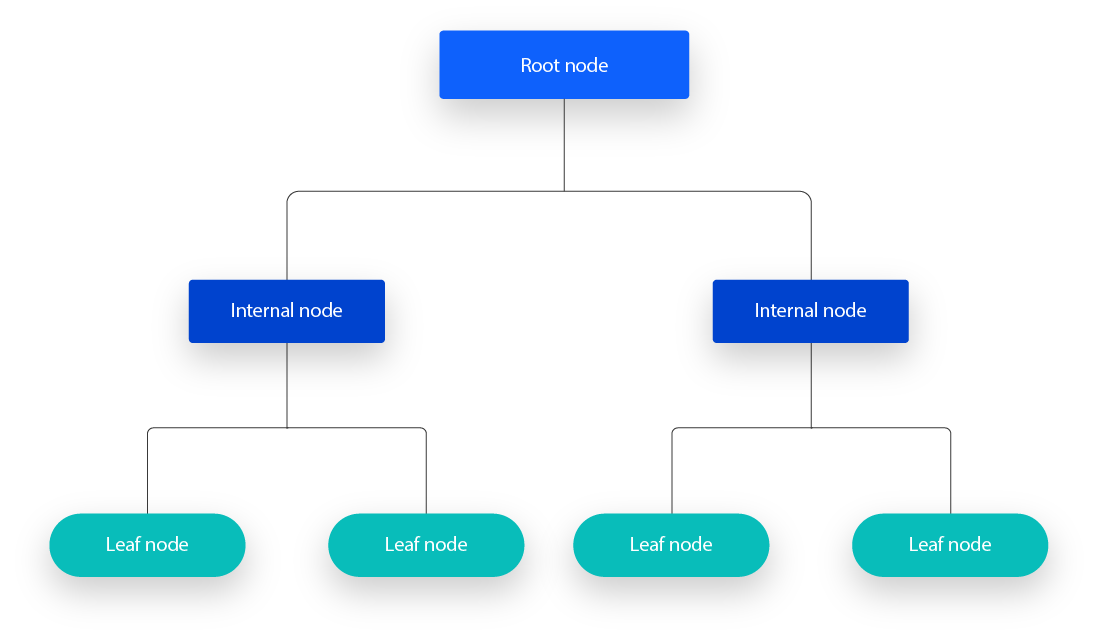

Der Entscheidungsbaum lernt durch rekursive Unterteilung der Trainingsdaten in möglichst homogene Teilmengen. Ziel ist es, die Daten so aufzuteilen, dass am Ende jeder Blattknoten eine möglichst reine Klasse enthält – also beispielsweise nur noch „Ja“- oder „Nein“-Kategorien oder eine spezifische Zielklasse.

Genug der Theorie. Schauen wir uns doch ein Entscheidungsbaum direkt im Code an:

## Entscheidungsbaum mit dem Titanic Datensatz

Der Datensatz basiert auf den Passagieren der RMS Titanic, die 1912 sank. Ziel ist es, vorherzusagen, ob ein Passagier überlebt hat oder nicht, basierend auf verschiedenen Merkmalen. Wir wollen nun ein vereinfachtes Beispiel mit dem Entscheidungsbaum durchführen.

### Importieren der Bibliotheken

**pandas:** Zum Laden und Bearbeiten von Tabellendaten.

**sklearn.tree.DecisionTreeClassifier:** Modelltyp für Klassifikation mit Entscheidungsbäumen.

**train_test_split:** Teilt die Daten in Trainings- und Testdaten.

**matplotlib.pyplot:** Zum Zeichnen des Entscheidungsbaums als Grafik.

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Datensatz laden

Der Titanic-Datensatz enthält Informationen über Passagiere: Geschlecht, Alter, Klasse – und ob sie überlebt haben.
Der Datensatz ist ein typisches Beispiel für binäre Klassifikation: überlebt vs. nicht überlebt.

In [7]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df_raw = pd.read_csv(url)
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Daten vorbereiten

Wir werden nicht alle Features verwenden, sondern uns auf die Passagierklasse `Pclass`, Geschlecht `Sex`, Alter `Age` und die Zielvariable `Survived` welche uns sagt ob ein Pasagier überlebt hat oder nicht. Das Geschlecht müssen wir noch in eine Nummer (0 und 1) umwandeln, damit der Algorithmus damit umgehen kann.

In [8]:
df = df_raw[["Pclass", "Sex", "Age", "Survived"]].dropna() ## Auswahl der Feature und entfernen von Null-Werten
df["Sex"] = df["Sex"].map({"male": 0, "female": 1}) ## Umwandeln von Geschlecht in ein numerischen Wert
df.head()

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0


### Trainings und Testdaten erstellen
Wir haben gelernt, dass wir zuerst den Algorithmus trainieren und anschliessend testen. Dafür teilen wir diesen auf in 70% Trainingsdaten und 30% Testdaten.

Zuerst werden die Daten noch getrennt:

X: Die Merkmale (z. B. Klasse, Geschlecht, Alter).

y: Das Ziel – ob jemand überlebt hat.

In [9]:
X = df[["Pclass", "Sex", "Age"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Entscheidungsbaum trainieren
Entscheidungsbäume stellen Fragen wie: „Ist die Person weiblich?“ → „Ja“ → „Ist die Klasse 1?“ usw.

max_depth=3: Begrenzung auf 3 Ebenen – wichtig für Verständlichkeit und Vermeidung von Überanpassung. Das heist unser Baum kann nicht tiefer als 3 Ebene werden, auch wenn die Daten noch nicht perfekt getrennt werden können.

In [10]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Baum Visualisieren

Die grafische Darstellung zeigt die Entscheidungsregeln und wie die Daten aufgeteilt werden.

Jeder Knoten stellt eine Frage dar (z. B. „Alter < 9.5?“).

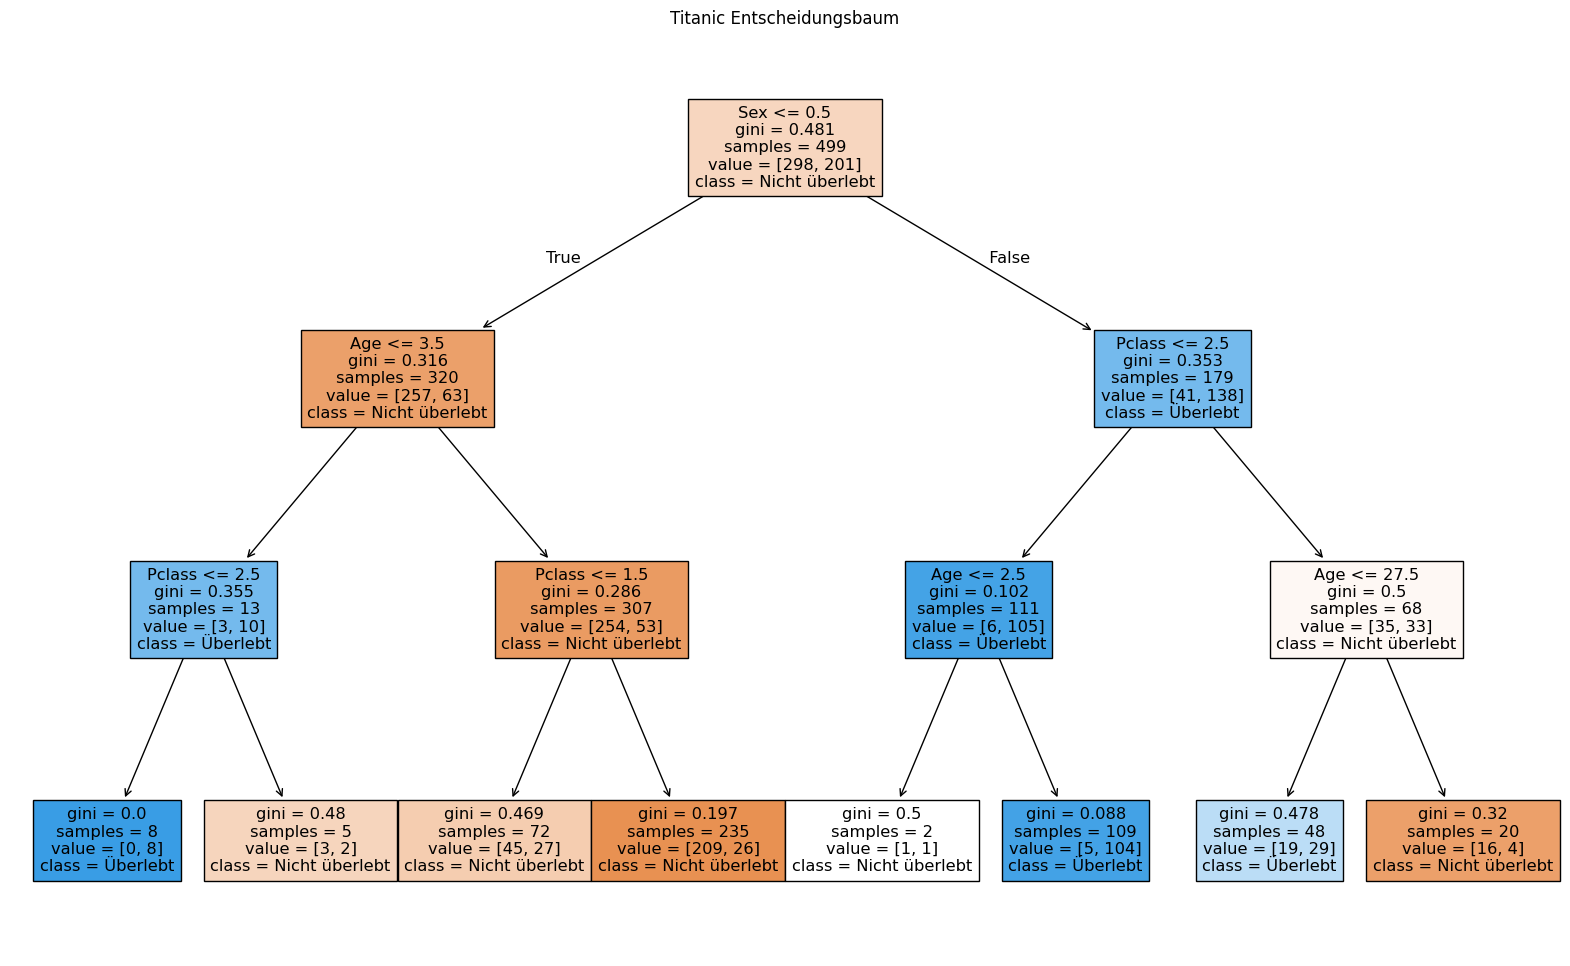

In [11]:
plt.figure(figsize=(20,12))
plot_tree(clf, feature_names=X.columns, class_names=["Nicht überlebt", "Überlebt"], filled=True)
plt.title("Titanic Entscheidungsbaum")
plt.show()

### Aufgabe
Versuche den Baum zu Verstehen. Kannst du herausfinden, was der Algorithmus vorhersagt für ein männliches Baby im Alter von 1 aus der ersten Klasse? Würde dies gemäss Algorithmus überleben oder nicht?

### Genauigkeit mit den Testdaten bestimmen

Die Genauigkeit sagt, wie viele Vorhersagen auf den Testdaten korrekt waren – z. B. 76 % richtig.

In [12]:
print("Genauigkeit auf Testdaten:", clf.score(X_test, y_test))

Genauigkeit auf Testdaten: 0.7627906976744186
